In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

import numpy as np
import pandas as pd

In [23]:
serial_results = pd.read_csv('../data/MMM_serial.csv', header=None)
openmp_results = pd.read_csv('../data/MMM_parallel.csv', header=None)
hybrid_results = pd.read_csv('../data/MMM_hybrid.csv', header=None)

serial_results.rename(columns={0: '# Threads', 1: 'Matrix Size', 2: 'Time'}, inplace=True)
openmp_results.rename(columns={0: '# Threads', 1: 'Matrix Size', 2: 'Time'}, inplace=True)
hybrid_results.rename(columns={0: 'Matrix Size', 1: '# Tasks', 2: '# Threads', 3 :'Time'}, inplace=True)

serial_results_avg = serial_results.groupby(['# Threads','Matrix Size'])['Time'].mean().reset_index()
openmp_results_avg = openmp_results.groupby(['# Threads','Matrix Size'])['Time'].mean().reset_index()
hybrid_results_avg = hybrid_results.groupby(['Matrix Size','# Tasks','# Threads'])['Time'].mean().reset_index()

In [18]:
def plot_restults(resutls,title,filename):
    groups = resutls.groupby('# Threads')

    plt.figure(figsize=(8, 6))

    for name, group in groups:
        plt.plot(group['Matrix Size'], group['Time'], marker='o', label=name)

    plt.xlabel('Matrix Size')
    plt.ylabel('Time')
    plt.title(title)

    plt.grid(True)

    plt.legend(title='# Threads')

    plt.savefig(filename)

    plt.show()

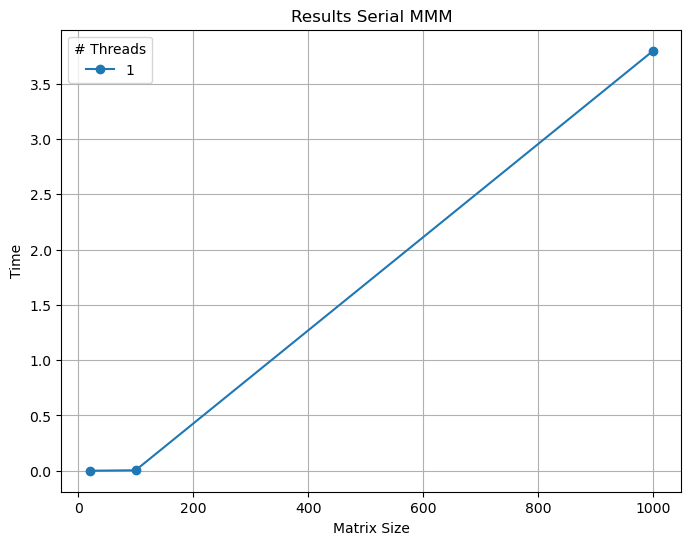

In [19]:
plot_restults(serial_results_avg,"Results Serial MMM","serial_results.jpg")

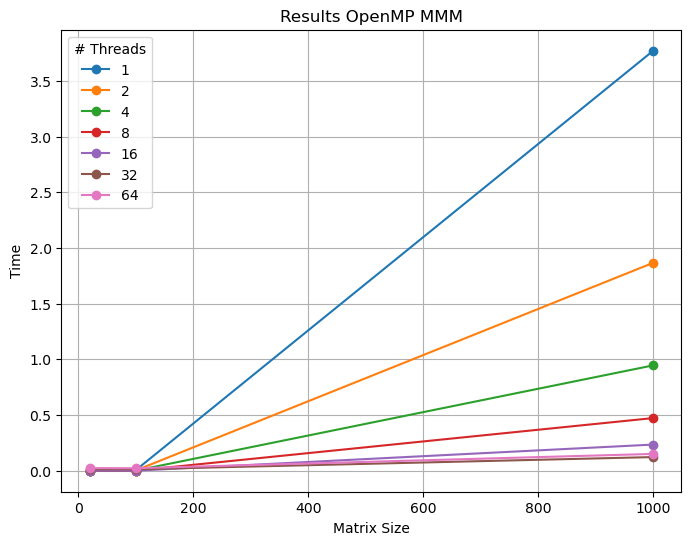

In [20]:
plot_restults(openmp_results_avg,"Results OpenMP MMM","openmp_results.jpg")

In [35]:
hybrid_by_tasks = hybrid_results_avg.groupby(['# Tasks','# Threads'])
for name, group in hybrid_by_tasks:
    print(group)
    print(name)
    print("------")
    #plot_restults(group,f'"Results Hybrid MMM {name} Tasks"',f'hybrid_results_{name}.jpg')

    Matrix Size  # Tasks  # Threads      Time
0            20        2         32  0.027633
6           100        2         32  0.033336
12         1000        2         32  0.363056
18         2000        2         32  3.102273
(2, 32)
------
    Matrix Size  # Tasks  # Threads      Time
1            20        4         16  0.046791
7           100        4         16  0.045417
13         1000        4         16  0.280240
19         2000        4         16  2.089318
(4, 16)
------
    Matrix Size  # Tasks  # Threads      Time
2            20        8          8  0.088034
8           100        8          8  0.089392
14         1000        8          8  0.300433
20         2000        8          8  2.668329
(8, 8)
------
    Matrix Size  # Tasks  # Threads      Time
3            20       16          4  0.177111
9           100       16          4  0.176741
15         1000       16          4  0.460168
21         2000       16          4  2.052775
(16, 4)
------
    Matrix Size  # Ta

In [43]:
def plot_restults_hybrid(resutls,title,filename):
    groups = resutls.groupby(['# Tasks','# Threads'])

    plt.figure(figsize=(8, 6))

    for name, group in groups:
        plt.plot(group['Matrix Size'], group['Time'], marker='o', label=f'tasks {name[0]} - threads {name[1]}')

    plt.xlabel('Matrix Size')
    plt.ylabel('Time')
    plt.title(title)

    plt.grid(True)

    plt.legend(title='# Tasks - # Threads')

    plt.savefig(filename)

    plt.show()

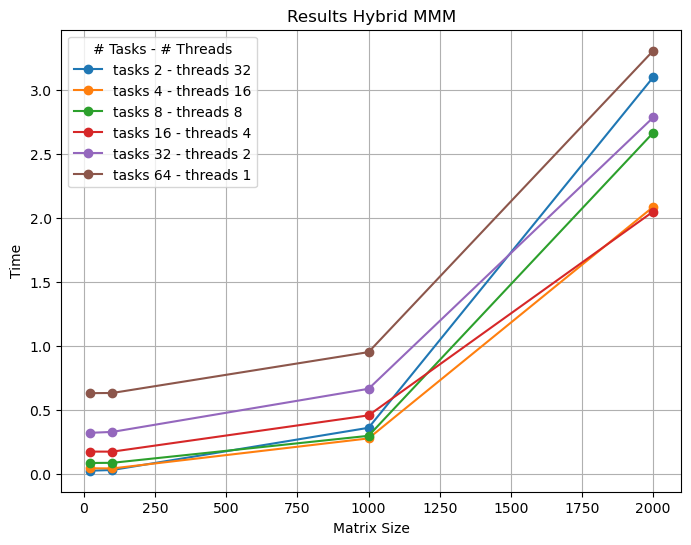

In [44]:
plot_restults_hybrid(hybrid_results_avg,"Results Hybrid MMM","hybrid_results.jpg")